Flat cell efficiency is: 18.15%

Nanostructured Cell Efficiency Table:
Height(nm)	Diameter(nm)	Jsc(mA/cm^2)	Voc(V)	FF	Efficiency(%)
145		42		29.30		1.10	0.804	25.93
145		53		29.55		1.10	0.804	26.14
145		61		29.72		1.10	0.804	26.30
195		42		31.50		1.10	0.823	28.52
195		53		31.75		1.10	0.823	28.74
195		61		31.92		1.10	0.823	28.90
230		42		33.04		1.10	0.836	30.40
230		53		33.29		1.10	0.836	30.62
230		61		33.46		1.10	0.836	30.78




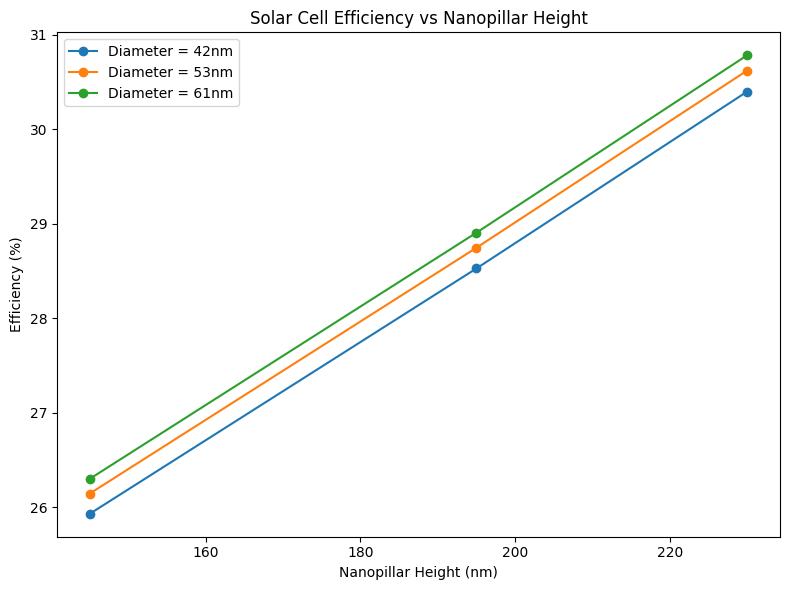

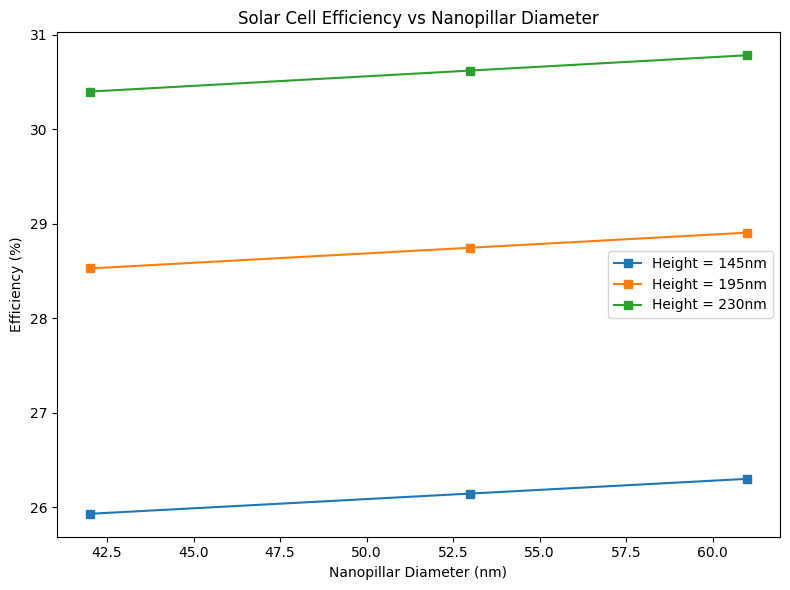


Best Nanostructure Configuration:
Height=230 nm, Diameter=61 nm, Efficiency=30.78%


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
try:
    base_dir = Path().resolve().parent
except NameError:
    base_dir = Path(__file__).parent.parent.resolve()
plots_dir = base_dir / 'plots'
simulations_dir = base_dir / 'simulations'
csvs_dir = base_dir / 'csvs'
os.makedirs(plots_dir, exist_ok = True)
os.makedirs(simulations_dir, exist_ok = True)
os.makedirs(csvs_dir, exist_ok = True)
q = 1.602e-19
k = 1.38e-23
T = 300
G = 1000
Area = 1e-4
flat_params = {'Jsc': 22.0, 'Voc': 1.1, 'FF': 0.75}
nanopillar_heights = [145, 195, 230]
nanopillar_diameters = [42, 53, 61]
def conversion_func(mAcm2):                # Since Jsc is given in mA/cm2 so convert it into mA/m2
    return mAcm2 * 10
def calculate_efficiency(Jsc, Voc, FF, G):
    J = conversion_func(Jsc)
    Pmax = J * Voc * FF
    efficiency = (Pmax / G) * 100
    return efficiency
flat_efficiency = calculate_efficiency(flat_params['Jsc'], flat_params['Voc'], flat_params['FF'], G)
print(f'Flat cell efficiency is: {flat_efficiency:.2f}%')

# Explore all nanopillar configurations

results = []
for h in nanopillar_heights:
    for d in nanopillar_diameters:
        Jsc_mod = flat_params['Jsc'] * (1 + 0.002*h + 0.001*d)
        FF_mod = flat_params['FF'] * (1 + 0.0005*h)
        Voc_mod = flat_params['Voc']
        efficiency_mod = calculate_efficiency(Jsc_mod, Voc_mod, FF_mod, G)
        results.append({'Height': h, 'Diameter': d, 'Jsc': Jsc_mod, 'Voc': Voc_mod, 'FF': FF_mod, 'Efficiency': efficiency_mod})

# Printing table of all efficiencies

print("\nNanostructured Cell Efficiency Table:")
print("Height(nm)\tDiameter(nm)\tJsc(mA/cm^2)\tVoc(V)\tFF\tEfficiency(%)")
for r in results:
    print(f"{r['Height']}\t\t{r['Diameter']}\t\t{r['Jsc']:.2f}\t\t{r['Voc']:.2f}\t{r['FF']:.3f}\t{r['Efficiency']:.2f}")
print('\n')

# Plotting Efficiency vs Height for each Diameter

plt.figure(figsize = (8,6))
for d in nanopillar_diameters:
    eff_vs_height = [r['Efficiency'] for r in results if r['Diameter'] == d]
    plt.plot(nanopillar_heights, eff_vs_height, marker = 'o', label = f'Diameter = {d}nm')
plt.title("Solar Cell Efficiency vs Nanopillar Height")
plt.xlabel("Nanopillar Height (nm)")
plt.ylabel("Efficiency (%)")
plt.legend()
plt.tight_layout()
plt.savefig(plots_dir / "efficiency_vs_height.png")
plt.show()

# Plotting Efficiency vs Diameter for each Height

plt.figure(figsize = (8,6))
for h in nanopillar_heights:
    eff_vs_diameter = [r['Efficiency'] for r in results if r['Height'] == h]
    plt.plot(nanopillar_diameters, eff_vs_diameter, marker = 's', label = f'Height = {h}nm')
plt.title("Solar Cell Efficiency vs Nanopillar Diameter")
plt.xlabel("Nanopillar Diameter (nm)")
plt.ylabel("Efficiency (%)")
plt.legend()
plt.tight_layout()
plt.savefig(plots_dir / "efficiency_vs_diameter.png")
plt.show()

df = pd.DataFrame(results)
df.to_csv(csvs_dir / "nanopillar_efficiencies.csv", index=False)

# To identify best configuration

best = max(results, key=lambda x: x['Efficiency'])
print(f"\nBest Nanostructure Configuration:")
print(f"Height={best['Height']} nm, Diameter={best['Diameter']} nm, Efficiency={best['Efficiency']:.2f}%")